# A few different sections of CV
- Binary classification (One thing or another)
- Multiclass calssification (More than one thing or another)
- Object dections (Detecting an object on a scree)
- Segmentation (Segmenting different sections of an image (layers))
- Tesla Computer visions, 8 cameras and 3-dim vector space

# Covering:
- Getting vision dataset to work with using torch.vision.datasets
- Convolutional nueral network (CNN) with PyTorch
- An end-to-end mutliclass image classification problem
- Steps into modelling with CNN in PyTorch

## Inputs and Outputs of CV
width, height, C (Color channels R,G,B) -> Tensor (numerical encoding) -> ML Algorithm (usually a CNN)-> outputs -> Predicted output

CNN perform the best with image data. Convolutinal nueral network

- `[batch_size, wight, height, color_channels]` (NHWC)
- `[batch_size, color_channels, height, width]` (NCHW) (Mainly pytorch)


## What is a convoultional nueral network (CNN)

Basic CNN Architecture
1. input images
2. input layer
3. convolution layer
4. hideen activation/non-linear activation
5. pooling layer
5. output layer/linear layer
6. output activation

This is only one way how a convolutional nueral network is made

### Libaries that will be used
1. `torchvision` - Base libary
2. `torchvision.datasets` - Get data sets and data loading functions for CV
3. `torch.vision.models` - get pretrained computer vision models that you can leverage for your own problems
4. `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML Model
5. `torch.utils.data.Dataset` - Create dataset with our own data
6. `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [105]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

### FashionMNIST Dataset

From torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
train_data = datasets.FashionMNIST(
    root="data", # Where to download data
    train=True, # Training or testing dataset
    download=True, # Download the dataset
    transform=ToTensor(), # How is the data transformed
    target_transform=None # Do we want to transform the labels/targets?
)

Test_data = datasets.FashionMNIST(
    root="data", # Where to download data
    train=False, # Training or testing dataset
    download=True, # Download the dataset
    transform=ToTensor(), # How is the data transformed
    target_transform=None # Do we want to transform the labels/targets?
)


100%|██████████| 26421880/26421880 [00:01<00:00, 16687338.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 267787.94it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4977427.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5176762.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
Test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
# Seeing the first training example
image, label = train_data[0]
image, label
# Label is what the image is, on the 0th index we see the label at the bottom and it is a ankle boot (See two cells below)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Shape of the first image & label is an integer so it does not have shape, but an index to the dictionary
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [9]:
print(f"Image shape {image.shape} -> [color_channels, height, width]")
print(f"Label: {class_name[label]}")

Image shape torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot : 9')

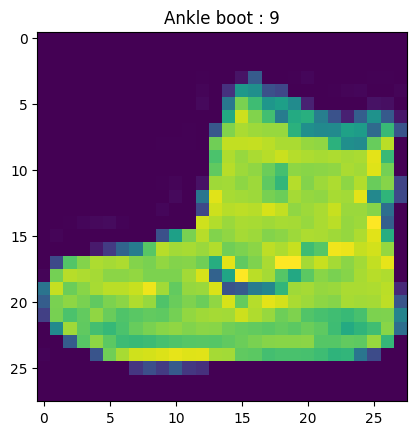

In [10]:
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{class_name[label]} : {label}")

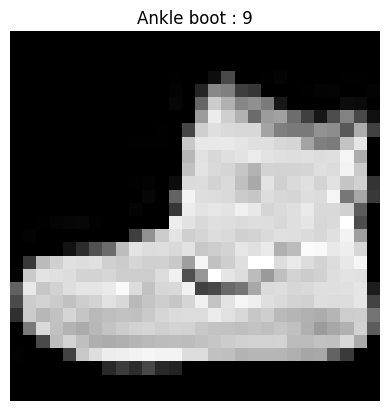

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_name[label]} : {label}")
plt.axis(False);

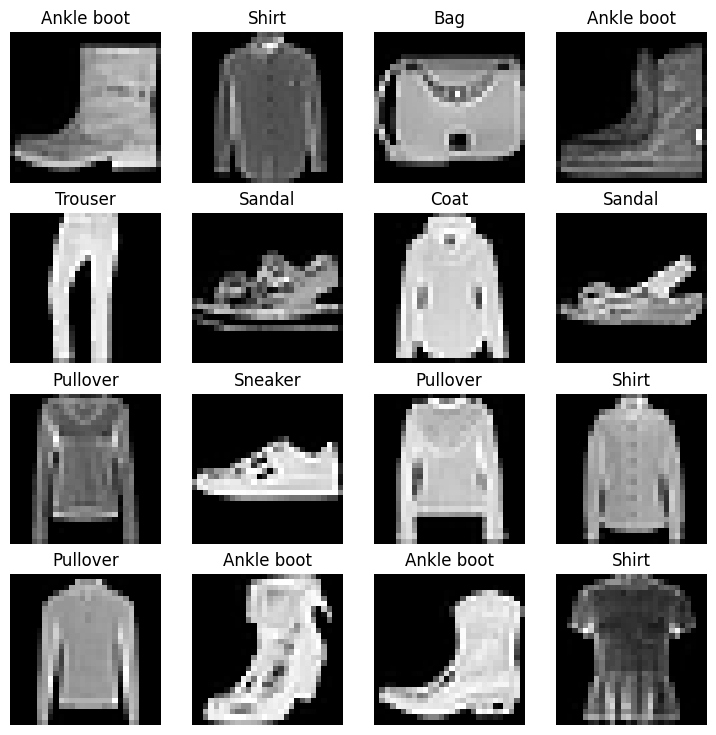

In [12]:
# Lets look at a few random integers
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows = 4
cols = 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray") # The image here
  plt.title(class_name[label]) # The label (what the image is)
  plt.axis(False)

This model will need to be modeled with non-lineararity. It will be hard to model this without non-linear lines.

### Will need to prepare a data loader
- We want to convert out tensors from a data set into a data loaders
- Our data currently is in the form of PyTorch Datasets
- Data loader will create out batches for us.

Dataloader turns our dataset into a python iterable.
- Specifically, we want to turn our data into batches (mini batches)

We break into batches to:
1. It is more computationally efficient, keeping in mind computing hardware. It may be hard for some computers to look at 60k images at once and storing it in memory. So in this case we will break down the images to 32 images at a time (batch size of 32). The batch size is a hyperparameter and can be changed if needed.
2. It gives the Neural network more chances to update its gradients per epoch. Allows for multiple updates per every 32 images, not every epoch (which would be at 60k images).


In [13]:
# Batchifying our fashionMNIST dataset
from torch.utils.data import DataLoader

# Setting the batch size
BATCH_SIZE = 32

# Turning data set into batches (iterables)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

Test_dataloader = DataLoader(dataset=Test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, Test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bf2e37aaf80>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf2e37aa8c0>)

In [14]:
# Length of the train and test
# It will tell us the # of batches in each dataloader
print(f"The training dataloader has {len(train_dataloader)} batches of {BATCH_SIZE}.")
print(f"The test dataloader has {len(Test_dataloader)} batches of {BATCH_SIZE}.")

The training dataloader has 1875 batches of 32.
The test dataloader has 313 batches of 32.


In [15]:
# Checking out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, torch.Size([])


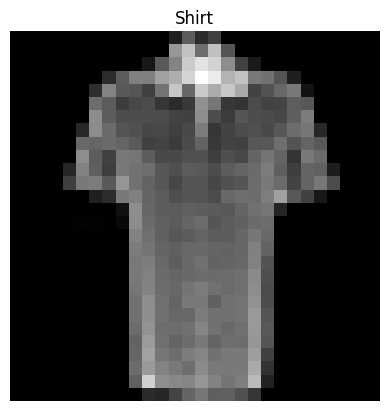

In [16]:
# Showing a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, {label.shape}")

### Building model 0 (Baseline model)
A Baseline model is a simple model you will try to improve upon with subsequent models/experiements

Text(0.5, 1.0, 'Sandal : Label 5')

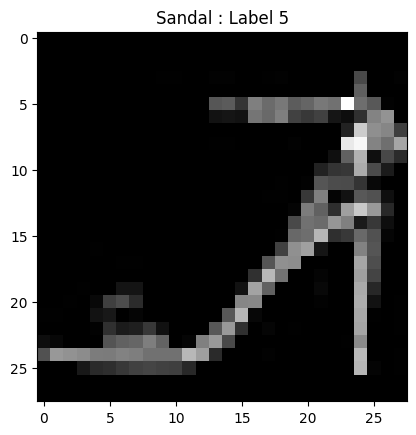

In [17]:
# Get a single sample
x = train_features_batch[0]
plt.imshow(x.squeeze(), cmap="gray")
plt.title(f"{class_name[train_labels_batch[0]]} : Label {train_labels_batch[0]}")

In [18]:
x.shape

torch.Size([1, 28, 28])

In [19]:
# Create a flatten layer
flatten_model = nn.Flatten()

output = flatten_model(x) # Perform the forward pass

# Printing out what happened
print(f"Shape pre-flattening {x.shape} --> [color_channels, height, width")
print(f"Shape post-flattening {output.shape} --> [color_channels, height*width]")
print(f"This is condesing the data from a multi-dim data to have single dim vector as input.")

Shape pre-flattening torch.Size([1, 28, 28]) --> [color_channels, height, width
Shape post-flattening torch.Size([1, 784]) --> [color_channels, height*width]
This is condesing the data from a multi-dim data to have single dim vector as input.


In [20]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)

# Setting up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # 784
    hidden_units = 10, # How many units in the hidden layer
    output_shape = len(class_name) # One for every class: there are 10 classes/ 10 possible labels.
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

This is good. Above we got an output of 10 logit values. However we still need to do out activation function.

* Since this is a multi-class classification problem we will be using `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - Classification problem, so we will use accuracy as our evaluation metric

In [24]:
# Setting up loss optimizer and
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# Creating a function to time our experiments
# Two of the main things that we want to track are
# 1) Models performance (loss and accuracy values)
# 2) How fast it runs
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [26]:
start_time = timer()
# Some
# Length
# Of
# Code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.7485000013457466e-05

## Creating a training loop and training a model on batches of data
- Optimizer will update a models parameter once per batch.
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch.*
3. loop through the testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out whats happening.
5. Time everything

In [27]:
from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (Smaller for faster training time)

epochs = 2

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n--------")

  ### Training
  train_loss = 0

  # add a loop to loop through training batches
  # X is our images, y is our labels
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate the loss (per batch)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss # Accumulate train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples.")
  # In Epoch loop: Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in Test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)

      # Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(Test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(Test_dataloader)

  # Print out whats happening
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

# Calculate the training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0 
--------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5095 | Test acc: 82.04%
Epoch: 1 
--------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4763 | Test Loss: 0.4799 | Test acc: 83.20%
Train time on cpu: 22.367 seconds


In [28]:
# Evaluating out model & make predictions and get model 0 results
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of ther models predicitng on the data loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      # could use the softmax activation function, however argmax grabs the highests prob and returns it (same as softmax activation function)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works with models created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                              data_loader=Test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47988998889923096,
 'model_acc': 83.19688498402556}

In [29]:
# Build model 1 and will train it on the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [30]:
# Creating the a model that run on the gpu & uses non-lineararity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=12,
                              output_shape=len(class_name)).to(device) # class_name is the length of the different classifications | 10
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=12, bias=True)
    (2): ReLU()
    (3): Linear(in_features=12, out_features=12, bias=True)
    (4): ReLU()
    (5): Linear(in_features=12, out_features=10, bias=True)
  )
)

In [31]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_1(dummy_x).shape
# Everything seems to check out! New model with ReLU() and more layers, and on the gpu need to be trained and tested

torch.Size([1, 10])

In [32]:
# Setting up loss and optimizer function
loss_fn = nn.CrossEntropyLoss() # Measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # Updates models parameters to reduce the loss
                            lr=0.1)

In [33]:
next(model_1.parameters()).device

device(type='cpu')

In [34]:
# Functionizing traning and evaluation/testing loops
# Training loop - train_step()
# Testing loop - test_step()

# Set the manual seed
torch.manual_seed(42)
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X_train, y_train) in enumerate(dataloader):
      # Send data to GPU
      X_train, y_train = X_train.to(device), y_train.to(device)

      # 1. Forward pass
      y_pred = model(X_train)

      # 2. Calculate loss
      loss = loss_fn(y_pred, y_train)
      train_loss += loss
      train_acc += accuracy_fn(y_true=y_train,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [35]:
def test_step(dataloader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X_test, y_test in dataloader:
            # Send data to GPU
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [36]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    train_step(dataloader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(Test_dataloader, model_1, loss_fn, accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.66887 | Train accuracy: 75.59%
Test loss: 0.53810 | Test accuracy: 80.60%

Epoch: 1
---------
Train loss: 0.48081 | Train accuracy: 82.51%
Test loss: 0.50670 | Test accuracy: 81.97%

Epoch: 2
---------
Train loss: 0.44738 | Train accuracy: 83.75%
Test loss: 0.45842 | Test accuracy: 83.61%

Train time on cpu: 32.361 seconds


## The difference?
With these non-linear layers and working on the GPU did not change much from using the CPU and using only linear layers. This is prob because our data does not require much non-linear lines. It is a straight forward dataset.

1. It could be that the ovewrhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware youre using has a better cpu in terms compute cabaility than the GPU.

More intense datasets and features will benefit from the GPU being used.

In [37]:
# Getting model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader = Test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45842018723487854,
 'model_acc': 83.60623003194888}

In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47988998889923096,
 'model_acc': 83.19688498402556}

## Model 2: Building a Convolutional Neural Network. (CNN)
- CNN's are also known ConvNets.
- CNN's are known for their capabilities to find patterns in visual data.

In [92]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # Conv2d for 2d data | Height and width
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparamters in our NN
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential( # Classifier layer to flatten the outputs
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # Trick to calculate this: Output shape of conv_block_2
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of Conv_block_1 {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of Conv_block_2 {x.shape}")
    x = self.classifier(x)
    return x

In [76]:
image.shape

torch.Size([1, 28, 28])

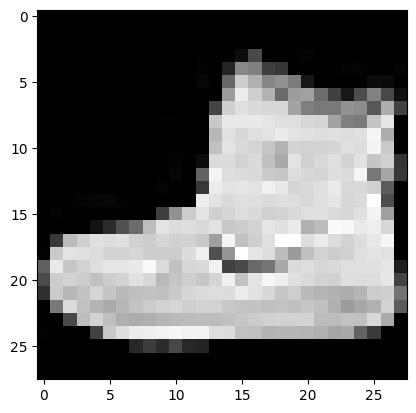

In [77]:
plt.imshow(image.squeeze(), cmap='gray')

In [93]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_name)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [94]:
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### NN.Conv2d()


In [95]:
torch.manual_seed(42)

# Creating a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [96]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [97]:
# Stepping through nn.MaxPool2d()
test_image.shape

torch.Size([3, 64, 64])

In [98]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [99]:
torch.manual_seed(42)

# Creating a random tensor with similar number of dimensions to our image
# (batch_size, color_channels, height, width)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\n Random Tensor pre maxpool layer:\n {random_tensor}")
print(f"Random tensor pre maxpool layer shpe: \n {random_tensor.shape}")
# Creating max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tnesor shape: {max_pool_tensor.shape}")


 Random Tensor pre maxpool layer:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor pre maxpool layer shpe: 
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tnesor shape: torch.Size([1, 1, 1, 1])


### Setting up loss function and optimizer for Model_2

In [100]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## Training and testing `model_2` using our training and test functions

In [102]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------------------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            dataloader=Test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------------------
Train loss: 0.41386 | Train accuracy: 85.17%
Test loss: 0.37275 | Test accuracy: 86.53%

Epoch: 1
---------------------
Train loss: 0.34610 | Train accuracy: 87.44%
Test loss: 0.34806 | Test accuracy: 87.02%

Epoch: 2
---------------------
Train loss: 0.31775 | Train accuracy: 88.55%
Test loss: 0.32642 | Test accuracy: 88.19%

Train time on cpu: 181.527 seconds


In [103]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=Test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3264242708683014,
 'model_acc': 88.18889776357827}

In [104]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47988998889923096,
 'model_acc': 83.19688498402556}

## Comparing results accross model and training time

In [106]:
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.479890,83.196885
1,FashionMNISTModelV1,0.458420,83.606230
2,FashionMNISTModelV2,0.326424,88.188898


In [108]:
# Adding training time to results comparison
compare_results["Training_Time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,Training_Time
0,FashionMNISTModelV0,0.479890,83.196885,22.367276
1,FashionMNISTModelV1,0.458420,83.606230,32.360978
2,FashionMNISTModelV2,0.326424,88.188898,181.526816


### Visualizing our models results

Text(0, 0.5, 'Model')

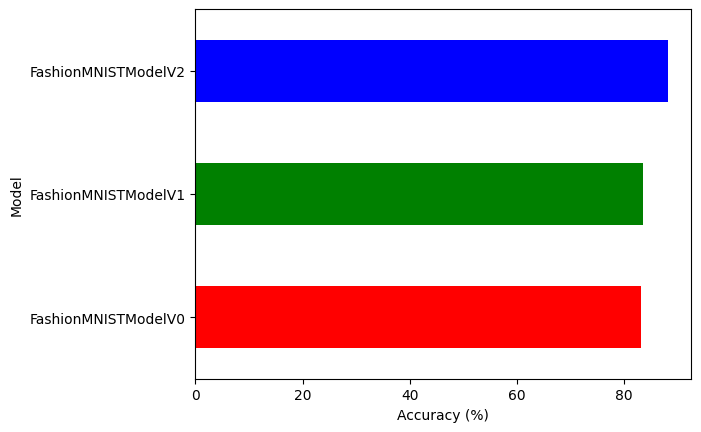

In [127]:
colors = ['red', 'green', 'blue']
compare_results.set_index("model_name")["model_acc"].plot(kind="barh", color=colors)
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

Text(0, 0.5, 'Model')

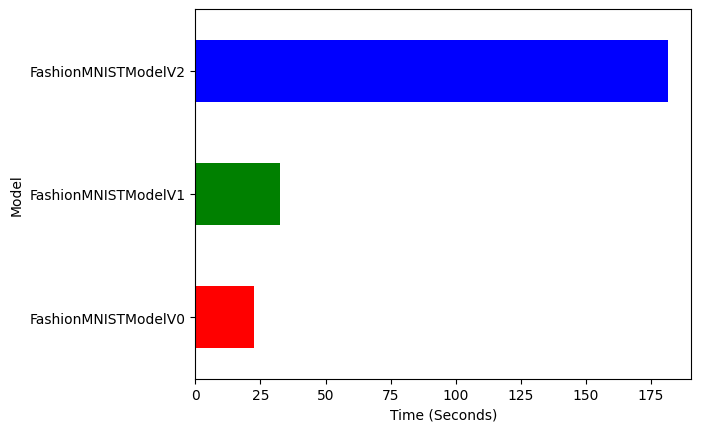

In [128]:
compare_results.set_index("model_name")["Training_Time"].plot(kind="barh", color=colors)
plt.xlabel("Time (Seconds)")
plt.ylabel("Model")

### Make and evaluate random predictions with best model (ModelV2)

In [145]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)


      # Forward Pass (Model outpuyts raw logits)
      pred_logit = model(sample)

      # Get Predicition probability (logis -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [154]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(Test_data), k=16):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [155]:
test_samples[0].shape, test_labels[0]

(torch.Size([1, 28, 28]), 5)

Text(0.5, 1.0, 'Sandal & Label Num: 5')

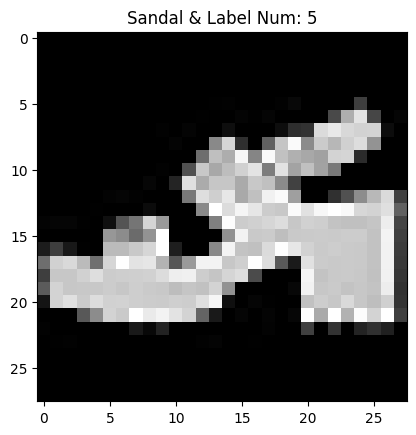

In [156]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(f"{class_name[test_labels[0]]} & Label Num: {test_labels[0]}")

In [157]:
# Make Predicitons
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[5.2984e-07, 2.0372e-07, 3.0523e-07, 2.9431e-06, 4.2719e-08, 9.9908e-01,
         4.4511e-06, 1.1761e-04, 1.0907e-04, 6.8647e-04],
        [6.0189e-02, 4.6018e-01, 5.3288e-04, 3.1255e-01, 3.6358e-02, 6.6737e-05,
         1.2810e-01, 1.0074e-03, 8.1107e-04, 2.1561e-04]])

In [158]:
# Converting predicition probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1, 9, 7, 2, 0, 1, 0, 3])

### Correct prediction will be **Green**
Incorrect Prediction will be **Red**

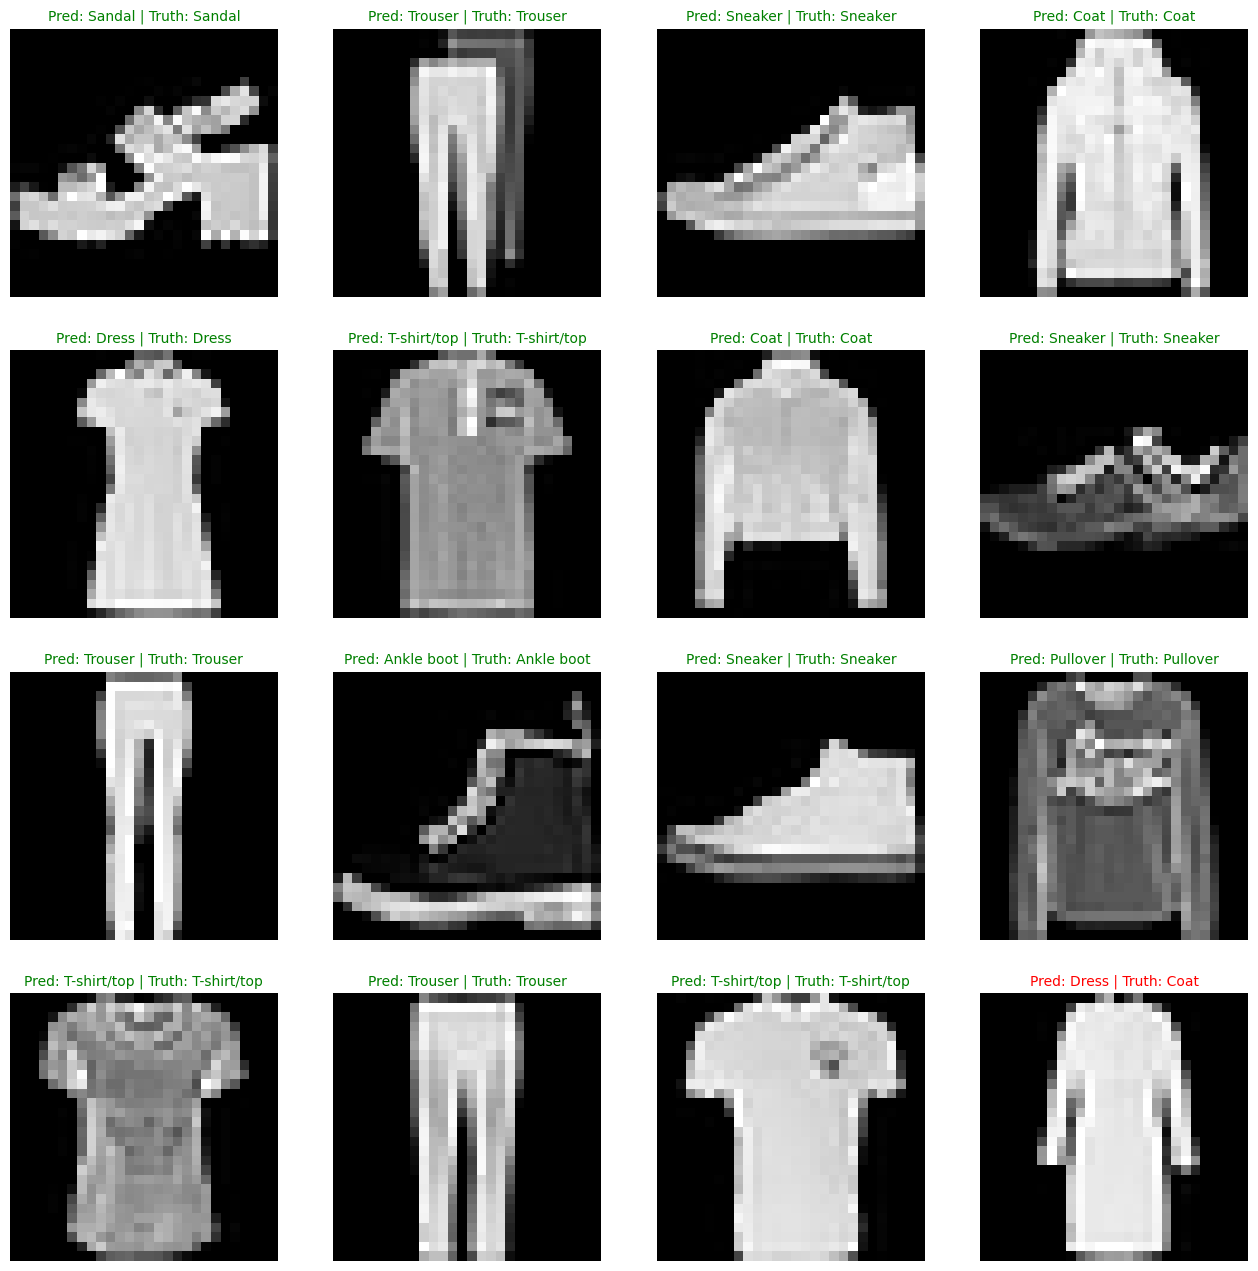

In [159]:
# Plotting predictions
plt.figure(figsize=(16,16))
nrows = 4
ncol = 4
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncol, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in text form. e.g "Sandal"
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text)
  truth_label = class_name[test_labels[i]]

  # Create title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)